# cancellation reason
- (A) Air Carrier;
- (B) Extreme Weather;
- (C) National Aviation System (NAS); and
- (D) Security.

# 1. Getting the data

In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, BaggingRegressor, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler

# performance metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [45]:
mylist = []

for chunk in  pd.read_csv('flights.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

df_flights = pd.concat(mylist, axis= 0)
del mylist

In [46]:
df_airlines =pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')

In [47]:
df_airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [48]:
df_iata_code_state = df_airports[['IATA_CODE', 'STATE']]
df_iata_code_state

,IATA_CODE,STATE
0,ABE,PA
1,ABI,TX
2,ABQ,NM
3,ABR,SD
4,ABY,GA
...,...,...
317,WRG,AK
318,WYS,MT
319,XNA,AR
320,YAK,AK


estado y df_fl
ORIGIN_AIRPORT en df_fl = IATA_CODE en df_airports

In [49]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_flights = df_flights.join(df_iata_code_state.set_index('IATA_CODE'), on='ORIGIN_AIRPORT')


In [51]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,STATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AK
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CA
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CA
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,CA
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,WA


In [52]:
df_fl = df_flights[['MONTH', 'DAY', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'STATE', 'WEATHER_DELAY', 'CANCELLATION_REASON']]

In [ ]:
dependentVar1= (df_fl['WEATHER_DELAY'])


dependentVar= np.where(( (df_fl['CANCELLATION_REASON']=='B') ), 1,0)
dependentVar= np.where(( (df_fl['WEATHER_DELAY'].notna()) ), 1,0)
df_fl['WEATHER_CONDITION'] = dependentVar

C:\Users\coraj\AppData\Local\Temp\ipykernel_35868\1341264800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl['WEATHER_CONDITION'] = dependentVar


In [ ]:
df_fl.drop(['SCHEDULED_DEPARTURE'], axis=1, inplace=True)
df_fl.drop(['WEATHER_DELAY'], axis=1, inplace=True)
df_fl.drop(['CANCELLATION_REASON'], axis=1, inplace=True)

C:\Users\coraj\AppData\Local\Temp\ipykernel_35868\2728054226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl.drop(['SCHEDULED_DEPARTURE'], axis=1, inplace=True)
C:\Users\coraj\AppData\Local\Temp\ipykernel_35868\2728054226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl.drop(['WEATHER_DELAY'], axis=1, inplace=True)
C:\Users\coraj\AppData\Local\Temp\ipykernel_35868\2728054226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [ ]:
df_fl

,MONTH,DAY,AIRLINE,STATE,WEATHER_CONDITION
0,1,1,AS,AK,0
1,1,1,AA,CA,0
2,1,1,US,CA,0
3,1,1,AA,CA,0
4,1,1,AS,WA,0
...,...,...,...,...,...
5819074,12,31,B6,CA,0
5819075,12,31,B6,NY,0
5819076,12,31,B6,NY,0
5819077,12,31,B6,FL,0


In [ ]:
corr = df_fl.corr()


In [ ]:
corr

,MONTH,DAY,AIRLINE,STATE
MONTH,1.000000,0.007729,-0.014194,-0.000952
DAY,0.007729,1.000000,-0.000493,-0.001109
AIRLINE,-0.014194,-0.000493,1.000000,0.012642
STATE,-0.000952,-0.001109,0.012642,1.000000


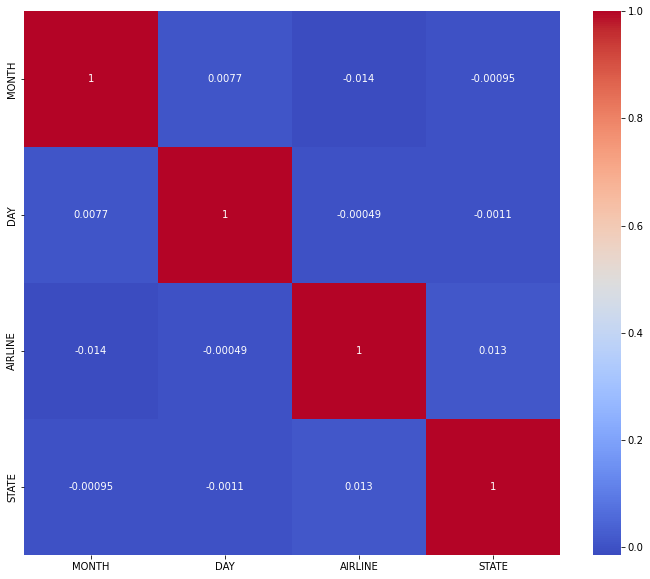

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_fl = df_fl.dropna(subset=['STATE'])

In [42]:
states=df_fl['STATE'].unique()
states

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [43]:
states_index = np.arange(1, len(states) + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [22]:
df_fl['STATE'].replace(states, states_index, inplace=True)



C:\Users\coraj\AppData\Local\Temp\ipykernel_35868\4080487768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl['STATE'].replace(states, states_index, inplace=True)


In [23]:
airline_code = df_fl['AIRLINE'].unique()

airline_index = []
for i in range(len(airline_code)):
    airline_index.append(i + 1)

df_fl['AIRLINE'].replace(airline_code, airline_index, inplace=True)


C:\Users\coraj\AppData\Local\Temp\ipykernel_35868\3447034123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fl['AIRLINE'].replace(airline_code, airline_index, inplace=True)


In [24]:
df_fl

,MONTH,DAY,AIRLINE,STATE,WEATHER_CONDITION
0,1,1,1,1,0
1,1,1,2,2,0
2,1,1,3,2,0
3,1,1,2,2,0
4,1,1,1,3,0
...,...,...,...,...,...
5819074,12,31,8,2,0
5819075,12,31,8,11,0
5819076,12,31,8,11,0
5819077,12,31,8,14,0


In [25]:
dependentVar = df_fl['WEATHER_CONDITION']
df_fl = df_fl.drop(['WEATHER_CONDITION'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split( df_fl, dependentVar, test_size = 0.3, random_state = 746)

In [35]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 

rd = RandomUnderSampler() 
  
X_train_rd, y_train_rd = rd.fit_sample(X_train, y_train.ravel()) 
X_test_rd, y_test_rd = rd.fit_sample(X_test, y_test.ravel()) 

  
print('After Undersampling, the shape of X_train: {}'.format(X_train_rd.shape)) 
print('After Undersampling, the shape of y_train: {} \n'.format(y_train_rd.shape)) 

print('After Undersampling, the shape of X_test: {}'.format(X_test_rd.shape)) 
print('After Undersampling, the shape of y_test: {} \n'.format(y_test_rd.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_rd == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_rd == 0)))

Before Undersampling, counts of label '1': 701879
Before Undersampling, counts of label '0': 3031160 

After Undersampling, the shape of X_train: (1403758, 4)
After Undersampling, the shape of y_train: (1403758,) 

After Undersampling, the shape of X_test: (602962, 4)
After Undersampling, the shape of y_test: (602962,) 

After Undersampling, counts of label '1': 701879
After Undersampling, counts of label '0': 701879


In [30]:
#create list of model and accuracy dicts
perform_list = []

# list to keep track of models
models = []

# list to keep track of proba scores
proba_score = []

In [28]:
dt = DecisionTreeClassifier()

# calculate accuracy of train
dt_acc = cross_val_score(dt, X_train_rd, y_train_rd, cv=10).mean()
dt_std = cross_val_score(dt, X_train_rd, y_train_rd, cv=10).std()
print('Accuracy of Decision Tree (TRAIN): {} +/- {}'.format(round(dt_acc, 2), round(dt_std, 2)))

# fit model
dt.fit(X_train_rd, y_train_rd)


Accuracy of Decision Tree (TRAIN): 0.63 +/- 0.0


DecisionTreeClassifier()

In [31]:

# get predictions and probabilities
dt_pred = dt.predict(X_test_rd)
dt_proba = dt.predict_proba(X_test_rd)

# calculate accuracy of test
dt_acc_test = round(accuracy_score(y_test_rd, dt_pred), 2)
print(f'Accuracy of Decision Tree (TEST): {dt_acc_test}')

# get precision, recall, f1-score
precision, recall, fscore, support = score(y_test_rd, dt_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# add model and accuracy dict to list
perform_list.append(dict([
    ('Model', 'Decision Tree'),
    ('Train Accuracy', round(dt_acc, 2)),
    ('Test Accuracy', dt_acc),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# add model to list
models.append('Decision Tree')
# add proba socre to list
proba_score.append(dt_proba)

Accuracy of Decision Tree (TEST): 0.63
Precision : 0.633795550735827
Recall    : 0.6335722649188507
F-score   : 0.6334193221160089


In [32]:
rf = RandomForestClassifier(n_estimators=100)

In [33]:
# fit model
rf.fit(X_train_rd, y_train_rd)


RandomForestClassifier()

In [34]:
# calculate accuracy of train
rf_acc = cross_val_score(rf, X_train_rd, y_train_rd, cv=10).mean()
rf_std = cross_val_score(rf, X_train_rd, y_train_rd, cv=10).std()
print('Accuracy of Random Forest (TRAIN): {} +/- {}'.format(round(rf_acc, 2), round(rf_std, 2)))

# get predictions and probabilities
rf_pred = rf.predict(X_cv_rd)
rf_proba= rf.predict_proba(X_cv_rd)

# calculate accuracy of test
rf_acc_test = round(accuracy_score(y_cv_rd, rf_pred), 2)
print(f'Accuracy of Random Forest (TEST): {rf_acc_test}')

# get precision, recall, f1-score
precision, recall, fscore, support = score(y_cv_rd, rf_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F-score   : {fscore}')

# add model and accuracy dict to list
perform_list.append(dict([
    ('Model', 'Random Forest'),
    ('Train Accuracy', round(rf_acc, 2)),
    ('Test Accuracy', rf_acc_test),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(fscore, 2))
     ]))

# add model to list
models.append('Random Forest')

# add proba socre to list
proba_score.append(rf_proba)

KeyboardInterrupt: 

## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [ ]:
df2['fuel_type'].replace(['gas', 'diesel'], [0, 1], inplace=True)
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [ ]:
x = df2.drop(['fuel_type'], axis=1)
y = df2['fuel_type']

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 746)

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


c:\Users\coraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [ 0  9]]


AUC

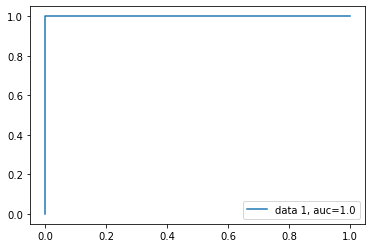

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Classification report

In [ ]:
#report classification
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       1.00      1.00      1.00        50
      diesel       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 746)

In [ ]:
model = GaussianNB()
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of Naive Bayes classifier on test set: 1.00


Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [ 0  9]]


AUC

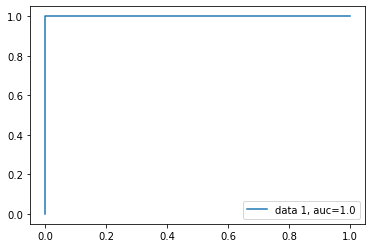

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Classification report

In [ ]:
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       1.00      1.00      1.00        50
      diesel       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

Minimum error: 0.11864406779661017 at K = 3


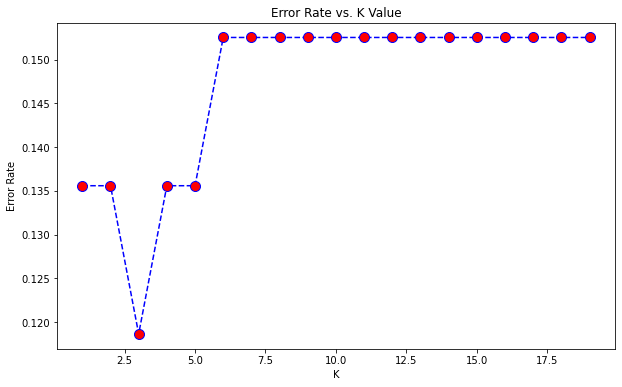

In [ ]:
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: {} at K = {}".format(min(error_rate), error_rate.index(min(error_rate)) +1))

The bes K for this model in this case will be K = 3

In [ ]:
#Train Model and Predict
k = 3 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
y_pred_proba = neigh.predict_proba(X_test)[::,1]
print("Accuracy of model at K = {} is: {}".format(k, metrics.accuracy_score(y_test, y_pred)))

Accuracy of model at K = 3 is: 0.8813559322033898


Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[49  1]
 [ 6  3]]


Classification report

In [ ]:
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       0.89      0.98      0.93        50
      diesel       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59



AUC

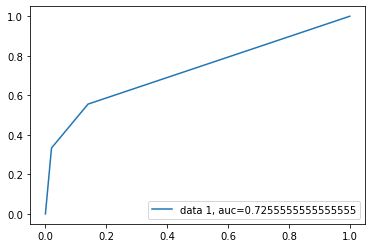

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [ ]:
# Instantiate model with 100 decision trees
clf = RandomForestClassifier(n_estimators = 100)
# Train the model on training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]

In [ ]:
print("Accuracy of model is: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of model is: 1.0


Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[50  0]
 [ 0  9]]


Classification report

In [ ]:
column_names = ['gas', 'diesel']
print(classification_report(y_test, y_pred, target_names=column_names))

              precision    recall  f1-score   support

         gas       1.00      1.00      1.00        50
      diesel       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



AUC

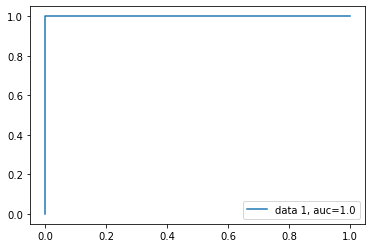

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

- Logistic regression, Accuracy of logistic regression classifier on test set: 1.00
- Naive Bayes, Accuracy of Naive Bayes classifier on test set: 1.00
- KNN, Accuracy of model at K = 3 is: 0.8813559322033898
- Random Forest, Accuracy of model is: 1.0

- the logistic regression, Naive Bayes and Random Forest did the best job, with an accuracy of 100%
- the Logistic regression, did not work because you need to normalize the data to use it in the model

## 4. Bonus question
**Try to fix the imbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferably one that "failed" before) and see if you get better results.**

In [ ]:
df2.fuel_type.value_counts()

0    175
1     20
Name: fuel_type, dtype: int64

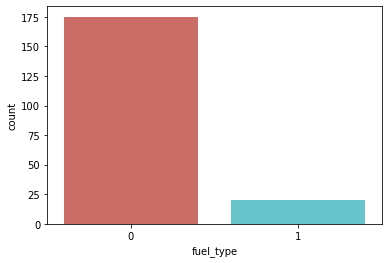

In [ ]:
sns.countplot(x='fuel_type', data=df2, palette='hls')
plt.show()

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


c:\Users\coraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


in this case we create more datas for X_train and y_train. But we get the exact same result, Accuracy of logistic regression classifier on test set: 1.00, and the warning is still there